# `truevoice-intent` Dataset

This notebook performs a preliminary exploration of the `truevoice-intent` dataset which was provided by [TrueVoice](http://www.truevoice.co.th/) through Nattapote Kuslasayanon. The texts are transcribed from customer service phone calls to a mobile phone service provider using Truevoice's [Mari](http://www.truevoice.co.th/en/true-voice-mari/). This dataset is a part of [pyThaiNLP](https://github.com/PyThaiNLP/) Thai text [classification-benchmarks](https://github.com/PyThaiNLP/classification-benchmarks). `texts` column contains raw texts and `texts_deepcut` column contains those segmented by [deepcut](https://github.com/rkcosmos/deepcut).

The benchmark features a set of **three multi-class classification tasks** for `action`, `object`, and `destination` of all the calls. Performance metrics are macro- and micro-averaged accuracy, F1 score, precision and recall.

In [1]:
import pandas as pd
import numpy as np
from pythainlp import word_tokenize
from ast import literal_eval
from tqdm import tqdm_notebook
from collections import Counter

#viz
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# #snippet to install thai font in matplotlib from https://gist.github.com/korakot/9d7f5db632351dc92607fdec72a4953f
import matplotlib

# !wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
# !cp thsarabunnew-webfont.ttf /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/
# !cp thsarabunnew-webfont.ttf /usr/share/fonts/truetype/

matplotlib.font_manager._rebuild()
matplotlib.rc('font', family='TH Sarabun New')

In [2]:
#for mac
import matplotlib
matplotlib.rc('font', family='Ayuthaya')

## Data Cleaning

From the original `.xlsx` files we cleaned the datasets and saved them as `.csv`.

In [8]:
# all_df = pd.read_excel('mari_deepcut_train.xlsx')
# test_df = pd.read_excel('mari_deepcut_test.xlsx')

# #select only relevant columns
# selected = ['Sentence Utterance', 'Sentence Utterance (deep cut)',
#            'Action', 'Object', 'Destination']

# all_df = all_df[selected]
# test_df = test_df[selected]

# all_df.columns = ['texts', 'texts_deepcut', 'action', 'object', 'destination']
# test_df.columns = ['texts', 'texts_deepcut', 'action', 'object', 'destination']

# for i in range(2,5):
#     all_df.iloc[:,i] = all_df.iloc[:,i].map(lambda x: x.lower())
#     test_df.iloc[:,i] = test_df.iloc[:,i].map(lambda x: x.lower())
    
# all_df.to_csv('mari_train.csv',index=False)
# test_df.to_csv('mari_test.csv',index=False)

## Load Data

In [9]:
all_df = pd.read_csv('mari-train-balanced.csv')
print(all_df.shape)
all_df.tail()

(10303, 5)


,texts,texts_deepcut,action,object,destination
10298,ครับผมติดเน็ตเมื่อวานนี้อ่ะครับ แล้วสัญญาณเน็ต...,ครับ ผม ติด เน็ต เมื่อ วาน นี้ อ่ะ ครับ แล้ว ส...,enquire,internet,internet
10299,สอบถามโปรฯ ที่เล่น line ได้ หมดแล้วหรือยังค่ะ,สอบถาม โปรฯ ที่ เล่น line ได้ หมด แล้ว หรือ ยั...,enquire,package,promotions
10300,โทรศัพท์โดนระงับสัญญาณค่ะ เป็นเพราะอะไรค่ะ,โทรศัพท์ โดน ระงับ สัญญาณ ค่ะ เป็น เพราะ อะไร ค่ะ,report,suspend,billing and payment
10301,ใช้ทรูมูฟย้ายมาทรูมูฟเอชมีข้อความส่งมาว่าย้ายใ...,ใช้ ทรู มูฟย้าย มา ทรู มูฟเอช มี ข้อความ ส่ง ม...,report,suspend,billing and payment
10302,ผมรับกล่องทรูมา แต่ไม่มีสัญญาณภาพครับ,ผม รับ กล่อง ทรู มา แต่ ไม่ มี สัญญาณ ภาพ ครับ,enquire,nontruemove,other queries


## Labels

### Label Distribution

(8, 3)


/Users/admin/.virtualenvs/sandbox/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Users/admin/.virtualenvs/sandbox/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


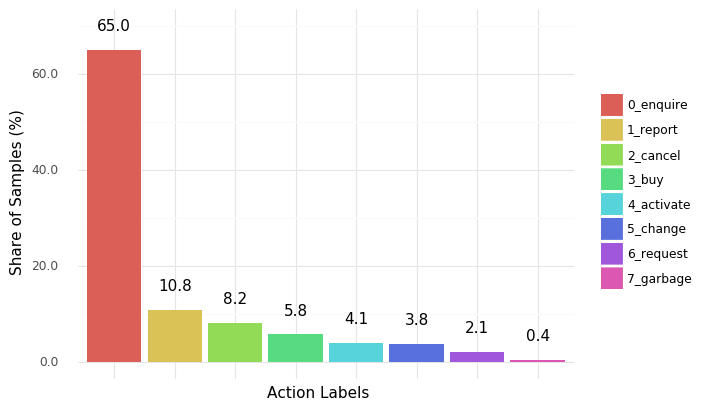

<ggplot: (-9223372036543841967)>

In [10]:
action_labels = pd.DataFrame(all_df.action.value_counts()).reset_index()
action_labels.columns = ['label','cnt']
action_labels['per'] = action_labels.cnt / np.sum(action_labels.cnt)
action_labels = action_labels.sort_values('cnt',ascending=False)
for i,row in action_labels.iterrows():
    action_labels.iloc[i,0] = f"{i}_{row['label']}"

print(action_labels.shape)
g = (ggplot(action_labels,aes(x='label', y='per', fill='label')) + geom_bar(stat='identity') +
    theme_minimal() + scale_y_continuous(labels = lambda x: np.round(x*100,0)) +
    xlab('Action Labels') + ylab('Share of Samples (%)') + 
    geom_text(aes(x='label',y='per+0.05',label='round(per*100,1)')) +
    theme(axis_text_x = element_blank(),legend_title=element_blank()))
g

(26, 3)


/Users/admin/.virtualenvs/sandbox/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Users/admin/.virtualenvs/sandbox/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Users/admin/.virtualenvs/sandbox/lib/python3.7/site-packages/plotnine/layer.py:517: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  return not cbook.iterable(value) and (cbook.is_numlike(value) or
/Users/admin/.virtualenvs/sandbox/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDepre

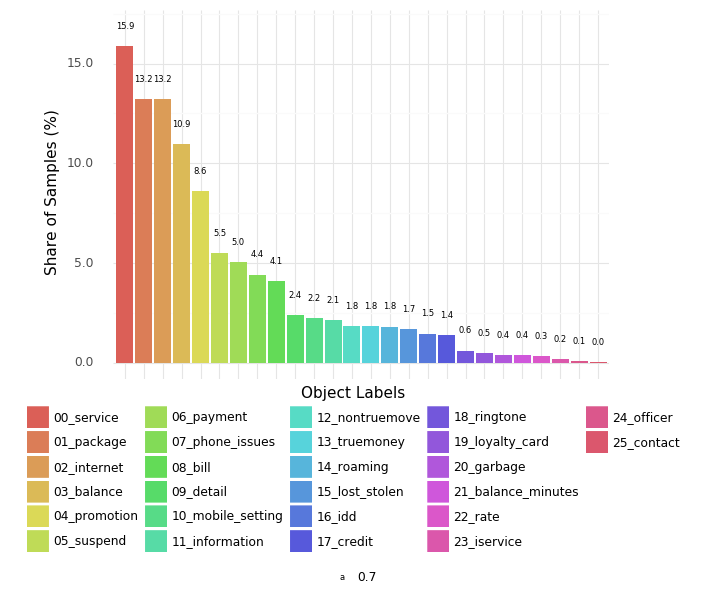

<ggplot: (311091222)>

In [11]:
object_labels = pd.DataFrame(all_df.object.value_counts()).reset_index()
object_labels.columns = ['label','cnt']
object_labels['per'] = object_labels.cnt / np.sum(object_labels.cnt)
object_labels = object_labels.sort_values('cnt',ascending=False)
for i,row in object_labels.iterrows():
    object_labels.iloc[i,0] = f"{i:02}_{row['label']}"

print(object_labels.shape)
g = (ggplot(object_labels,aes(x='label', y='per', fill='label')) + geom_bar(stat='identity') +
    theme_minimal() + scale_y_continuous(labels = lambda x: np.round(x*100,0)) +
    xlab('Object Labels') + ylab('Share of Samples (%)') + 
    geom_text(aes(x='label',y='per+0.01',label='round(per*100,1)',size=0.7)) +
    theme(axis_text_x = element_blank(),legend_title=element_blank(),legend_position='bottom'))
g

(7, 3)


/Users/admin/.virtualenvs/sandbox/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Users/admin/.virtualenvs/sandbox/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


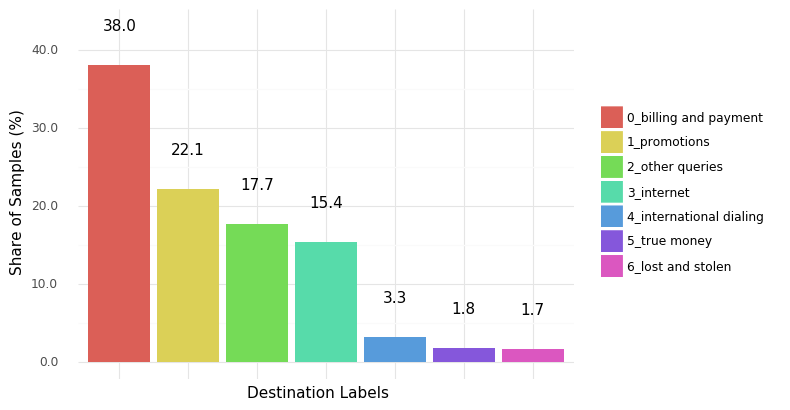

<ggplot: (-9223372036541289468)>

In [12]:
destination_labels = pd.DataFrame(all_df.destination.value_counts()).reset_index()
destination_labels.columns = ['label','cnt']
destination_labels['per'] = destination_labels.cnt / np.sum(destination_labels.cnt)
destination_labels = destination_labels.sort_values('cnt',ascending=False)
for i,row in destination_labels.iterrows():
    destination_labels.iloc[i,0] = f"{i}_{row['label']}"

print(destination_labels.shape)
g = (ggplot(destination_labels,aes(x='label', y='per', fill='label')) + geom_bar(stat='identity') +
    theme_minimal() + scale_y_continuous(labels = lambda x: np.round(x*100,0)) +
    xlab('Destination Labels') + ylab('Share of Samples (%)') + 
    geom_text(aes(x='label',y='per+0.05',label='round(per*100,1)')) +
    theme(axis_text_x = element_blank(),legend_title=element_blank()))
g

### Label Association

In [13]:
all_df[['action','destination']].pivot_table(index='action', 
                                             columns='destination', 
                                             aggfunc=len, fill_value=0)

destination,billing and payment,international dialing,internet,lost and stolen,other queries,promotions,true money
action,,,,,,,
activate,404,14,0,0,0,0,0
buy,0,0,0,0,0,593,0
cancel,0,0,0,0,840,0,0
change,77,0,0,0,0,317,0
enquire,2496,322,1588,0,728,1370,188
garbage,0,0,0,0,39,0,0
report,939,0,0,172,4,0,0
request,0,0,0,0,212,0,0


In [14]:
all_df[['object','action']].pivot_table(index='object', 
                                             columns='action', 
                                             aggfunc=len, fill_value=0)

action,activate,buy,cancel,change,enquire,garbage,report,request
object,,,,,,,,
balance,0,0,0,0,1128,0,0,0
balance_minutes,0,0,0,0,37,0,0,0
bill,0,0,0,0,422,0,0,0
contact,0,0,0,0,0,0,4,0
credit,0,0,0,0,141,0,0,0
detail,0,0,0,77,170,0,0,0
garbage,0,0,0,0,0,39,0,0
idd,14,0,0,0,136,0,0,0
information,0,0,0,0,17,0,0,203


In [15]:
all_df[['object','destination']].pivot_table(index='object', 
                                             columns='destination', 
                                             aggfunc=len, fill_value=0)

destination,billing and payment,international dialing,internet,lost and stolen,other queries,promotions,true money
object,,,,,,,
balance,1128,0,0,0,0,0,0
balance_minutes,37,0,0,0,0,0,0
bill,422,0,0,0,0,0,0
contact,0,0,0,0,4,0,0
credit,141,0,0,0,0,0,0
detail,247,0,0,0,0,0,0
garbage,0,0,0,0,39,0,0
idd,0,150,0,0,0,0,0
information,0,0,0,0,220,0,0


## Texts

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
texts_cnt = CountVectorizer(tokenizer=lambda x: x.split())
texts_mat = texts_cnt.fit_transform(all_df.texts_deepcut)
texts_mat.shape

(10303, 4928)

### Word Count Distribution

In [17]:
texts_wc = pd.DataFrame(texts_mat.sum(axis=1))
texts_wc.columns = ['word_count']

/Users/admin/.virtualenvs/sandbox/lib/python3.7/site-packages/plotnine/utils.py:54: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(val) and not is_string(val):
/Users/admin/.virtualenvs/sandbox/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):


Average Text Word Count: 12.20702707949141


/Users/admin/.virtualenvs/sandbox/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


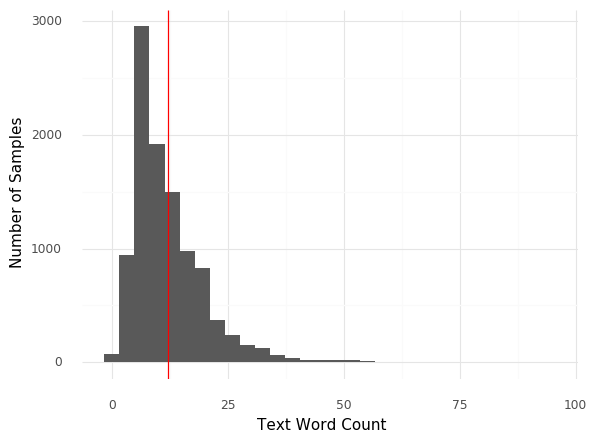

<ggplot: (310427186)>

In [18]:
g = (ggplot(texts_wc, aes(x='word_count')) + geom_histogram(bins=30) + theme_minimal() +
    xlab('Text Word Count') + ylab('Number of Samples') + 
    geom_vline(xintercept = np.mean(texts_wc.word_count), color='red'))
print(f'Average Text Word Count: {np.mean(texts_wc.word_count)}')
g

/Users/admin/.virtualenvs/sandbox/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Users/admin/.virtualenvs/sandbox/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


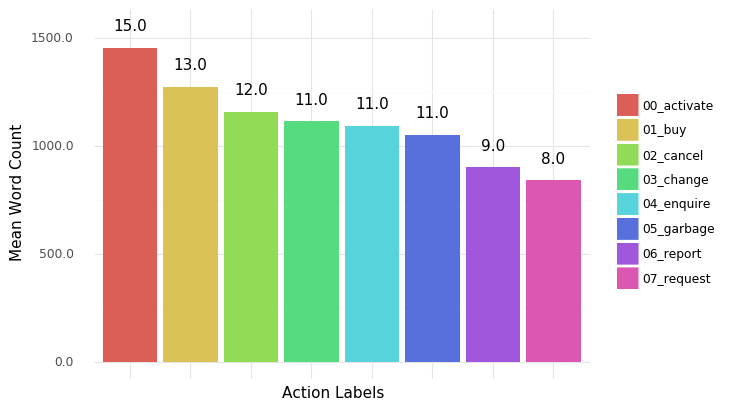

<ggplot: (313798113)>

In [19]:
all_df['wc'] = texts_wc['word_count']
action_agg = all_df[['action','wc']].groupby('action').mean().reset_index()\
    .sort_values('wc',ascending=False)
for i,row in action_agg.iterrows():
    action_agg.iloc[i,0] = f"{i:02}_{row['action']}"
g = (ggplot(action_agg,aes(x='action', y='wc', fill='action')) + geom_bar(stat='identity') +
    theme_minimal() + scale_y_continuous(labels = lambda x: np.round(x*100,0)) +
    xlab('Action Labels') + ylab('Mean Word Count') + 
    geom_text(aes(x='action',y='wc+1',label='round(wc)')) +
    theme(axis_text_x = element_blank(),legend_title=element_blank()))
g

/Users/admin/.virtualenvs/sandbox/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Users/admin/.virtualenvs/sandbox/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


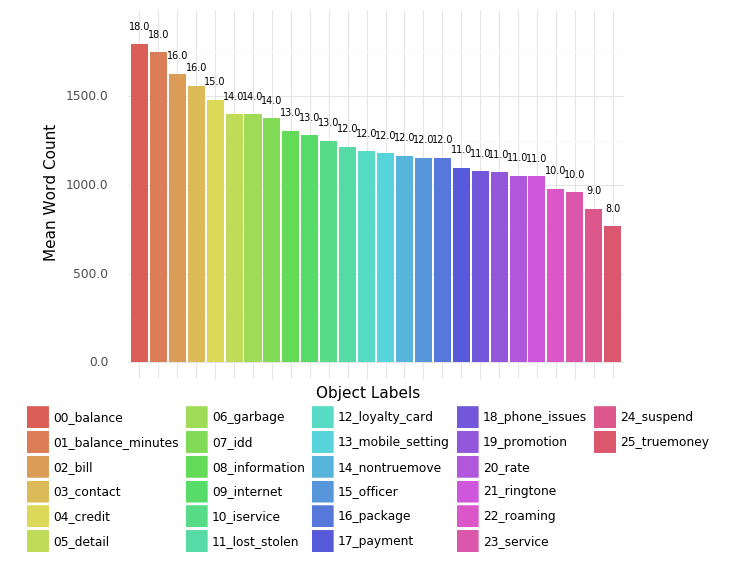

<ggplot: (-9223372036540982012)>

In [20]:
all_df['wc'] = texts_wc['word_count']
object_agg = all_df[['object','wc']].groupby('object').mean().reset_index()\
    .sort_values('wc',ascending=False)
for i,row in object_agg.iterrows():
    object_agg.iloc[i,0] = f"{i:02}_{row['object']}"
g = (ggplot(object_agg,aes(x='object', y='wc', fill='object')) + geom_bar(stat='identity') +
    theme_minimal() + scale_y_continuous(labels = lambda x: np.round(x*100,0)) +
    xlab('Object Labels') + ylab('Mean Word Count') + 
    geom_text(aes(x='object',y='wc+1',label='round(wc)'), size = 7) +
    theme(axis_text_x = element_blank(),legend_title=element_blank(),legend_position='bottom'))
g

/Users/admin/.virtualenvs/sandbox/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/Users/admin/.virtualenvs/sandbox/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


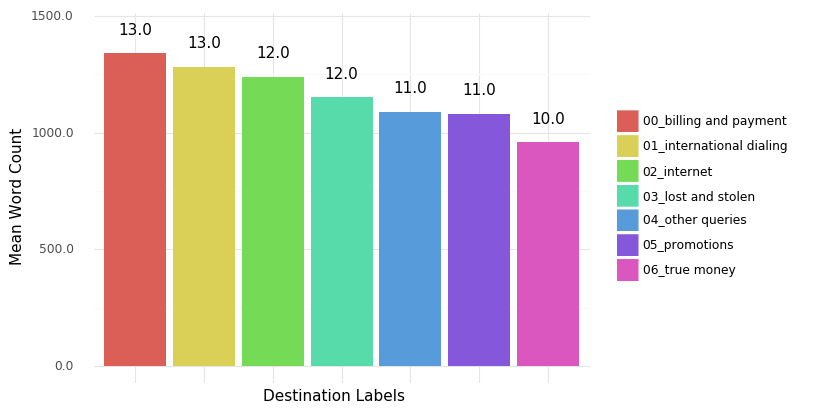

<ggplot: (314030747)>

In [21]:
all_df['wc'] = texts_wc['word_count']
destination_agg = all_df[['destination','wc']].groupby('destination').mean().reset_index()\
    .sort_values('wc',ascending=False)
for i,row in destination_agg.iterrows():
    destination_agg.iloc[i,0] = f"{i:02}_{row['destination']}"
g = (ggplot(destination_agg,aes(x='destination', y='wc', fill='destination')) + geom_bar(stat='identity') +
    theme_minimal() + scale_y_continuous(labels = lambda x: np.round(x*100,0)) +
    xlab('Destination Labels') + ylab('Mean Word Count') + 
    geom_text(aes(x='destination',y='wc+1',label='round(wc)')) +
    theme(axis_text_x = element_blank(),legend_title=element_blank()))
g

### Word Frequency

In [22]:
texts_top = pd.DataFrame({
    'vocab': list(texts_cnt.get_feature_names()),
    'cnt': np.asarray(texts_mat.sum(axis=0)).squeeze()}).sort_values('cnt',ascending=False)
texts_top = texts_top.reset_index(drop=True).reset_index()

/Users/admin/.virtualenvs/sandbox/lib/python3.7/site-packages/plotnine/utils.py:54: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(val) and not is_string(val):
/Users/admin/.virtualenvs/sandbox/lib/python3.7/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):


Mean Word Frequency: 25.521306818181817


/Users/admin/.virtualenvs/sandbox/lib/python3.7/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


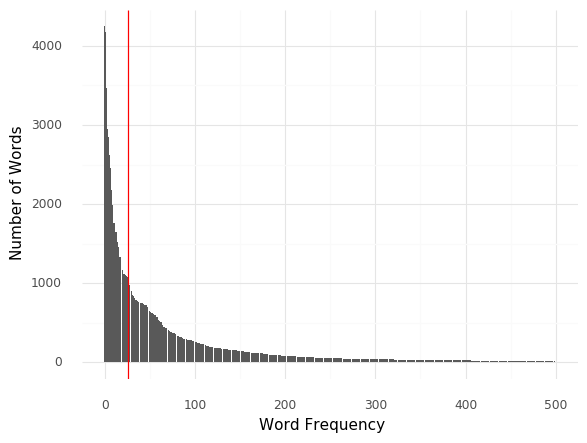

<ggplot: (314030761)>

In [23]:
g = (ggplot(texts_top.iloc[:500,:], aes(x='index',y='cnt')) + 
     geom_bar(stat='identity') + 
     theme_minimal() +
     xlab('Word Frequency') + ylab('Number of Words') + 
     geom_vline(xintercept = np.mean(texts_top.cnt), color='red'))
print(f'Mean Word Frequency: {np.mean(texts_top.cnt)}')
g

In [24]:
texts_top.head(10)

,index,vocab,cnt
0,0,จะ,4247
1,1,ค่ะ,4178
2,2,ครับ,3472
3,3,ได้,2946
4,4,ไม่,2846
5,5,ใช้,2619
6,6,สอบถาม,2462
7,7,ว่า,2178
8,8,ผม,2122
9,9,แล้ว,1989


In [25]:
texts_top.tail(10)

,index,vocab,cnt
4918,4918,สายอินเตอร์เน็ต,1
4919,4919,สายเพลง,1
4920,4920,สายเลย,1
4921,4921,สายแลนด์,1
4922,4922,สาร,1
4923,4923,ดวงอ่ะค่ะ,1
4924,4924,สาเหตุอะไร,1
4925,4925,สำนักงานกฎหมาย,1
4926,4926,ดรอปลง,1
4927,4927,รับไม,1


## Text Feature Correlations

In [26]:
from class_features import *
from sklearn.feature_extraction.text import TfidfVectorizer

/Users/admin/.virtualenvs/sandbox/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/admin/.virtualenvs/sandbox/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


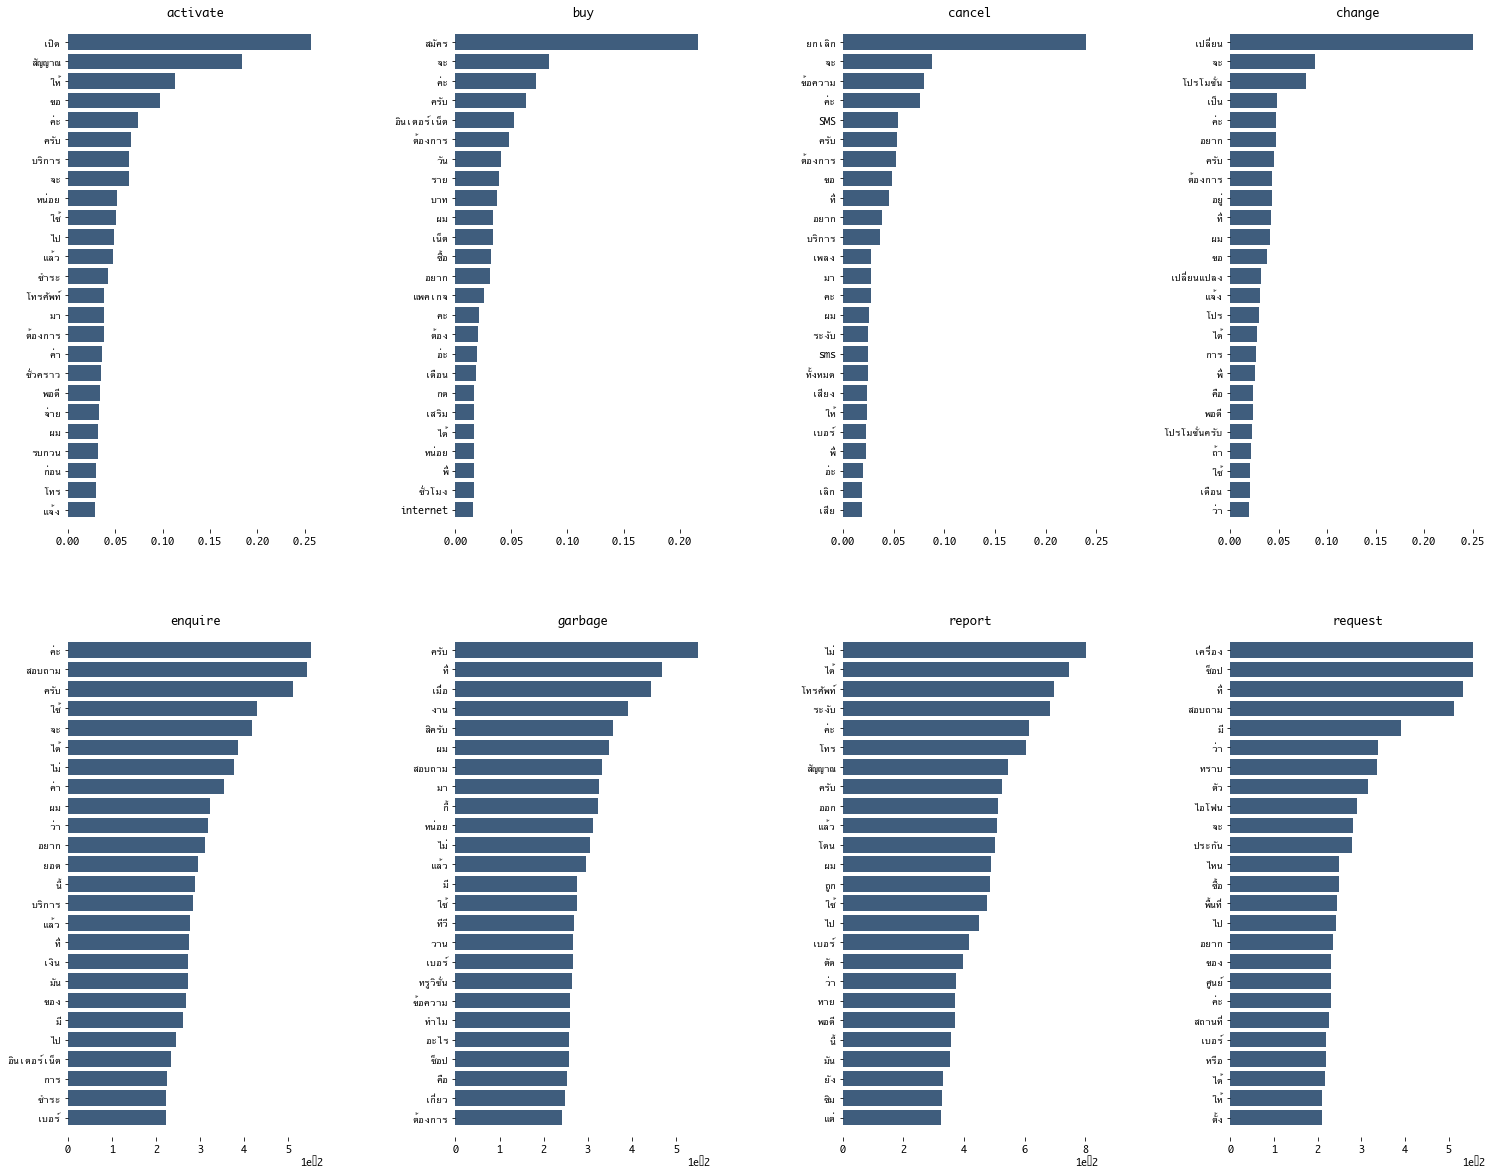

In [27]:
show_classfeats(
    df=all_df,
    vectorizer=TfidfVectorizer,
    analyzer=lambda x: x.split(),
    text_col='texts_deepcut',
    class_col='action'
)

/Users/admin/.virtualenvs/sandbox/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/admin/.virtualenvs/sandbox/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


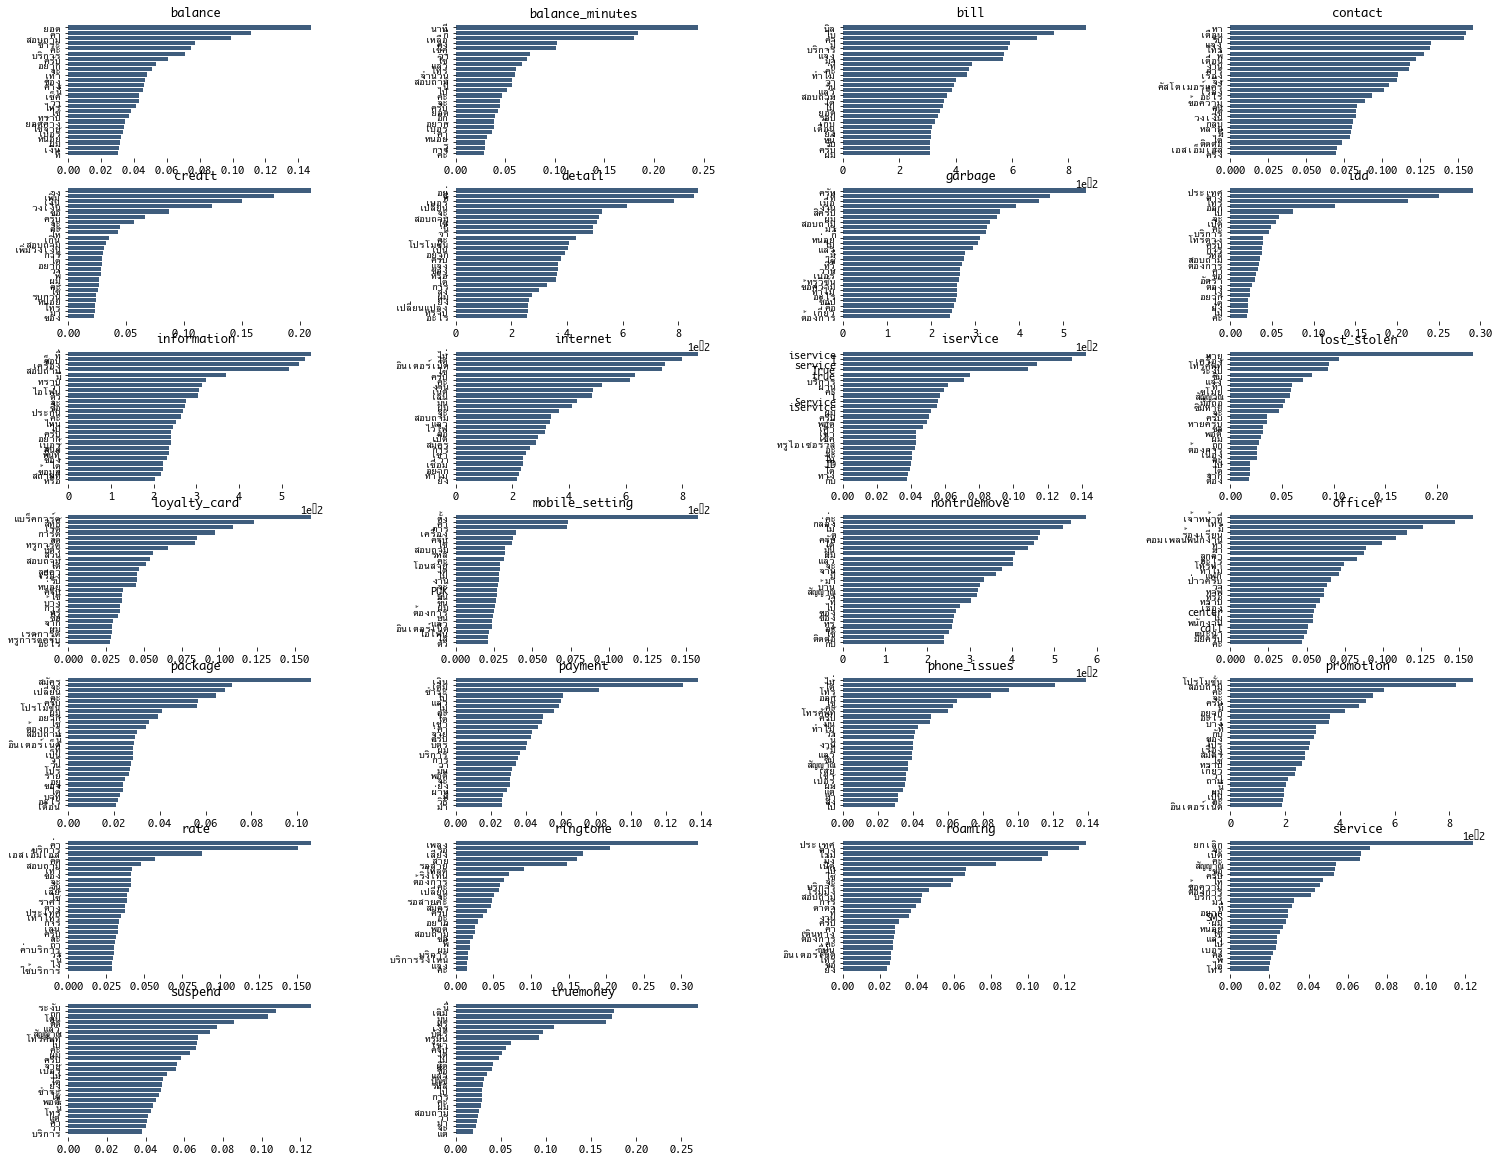

In [28]:
show_classfeats(
    df=all_df,
    vectorizer=TfidfVectorizer,
    analyzer=lambda x: x.split(),
    text_col='texts_deepcut',
    class_col='object',
    nrow=7,
    ncol=4
)

/Users/admin/.virtualenvs/sandbox/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/admin/.virtualenvs/sandbox/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


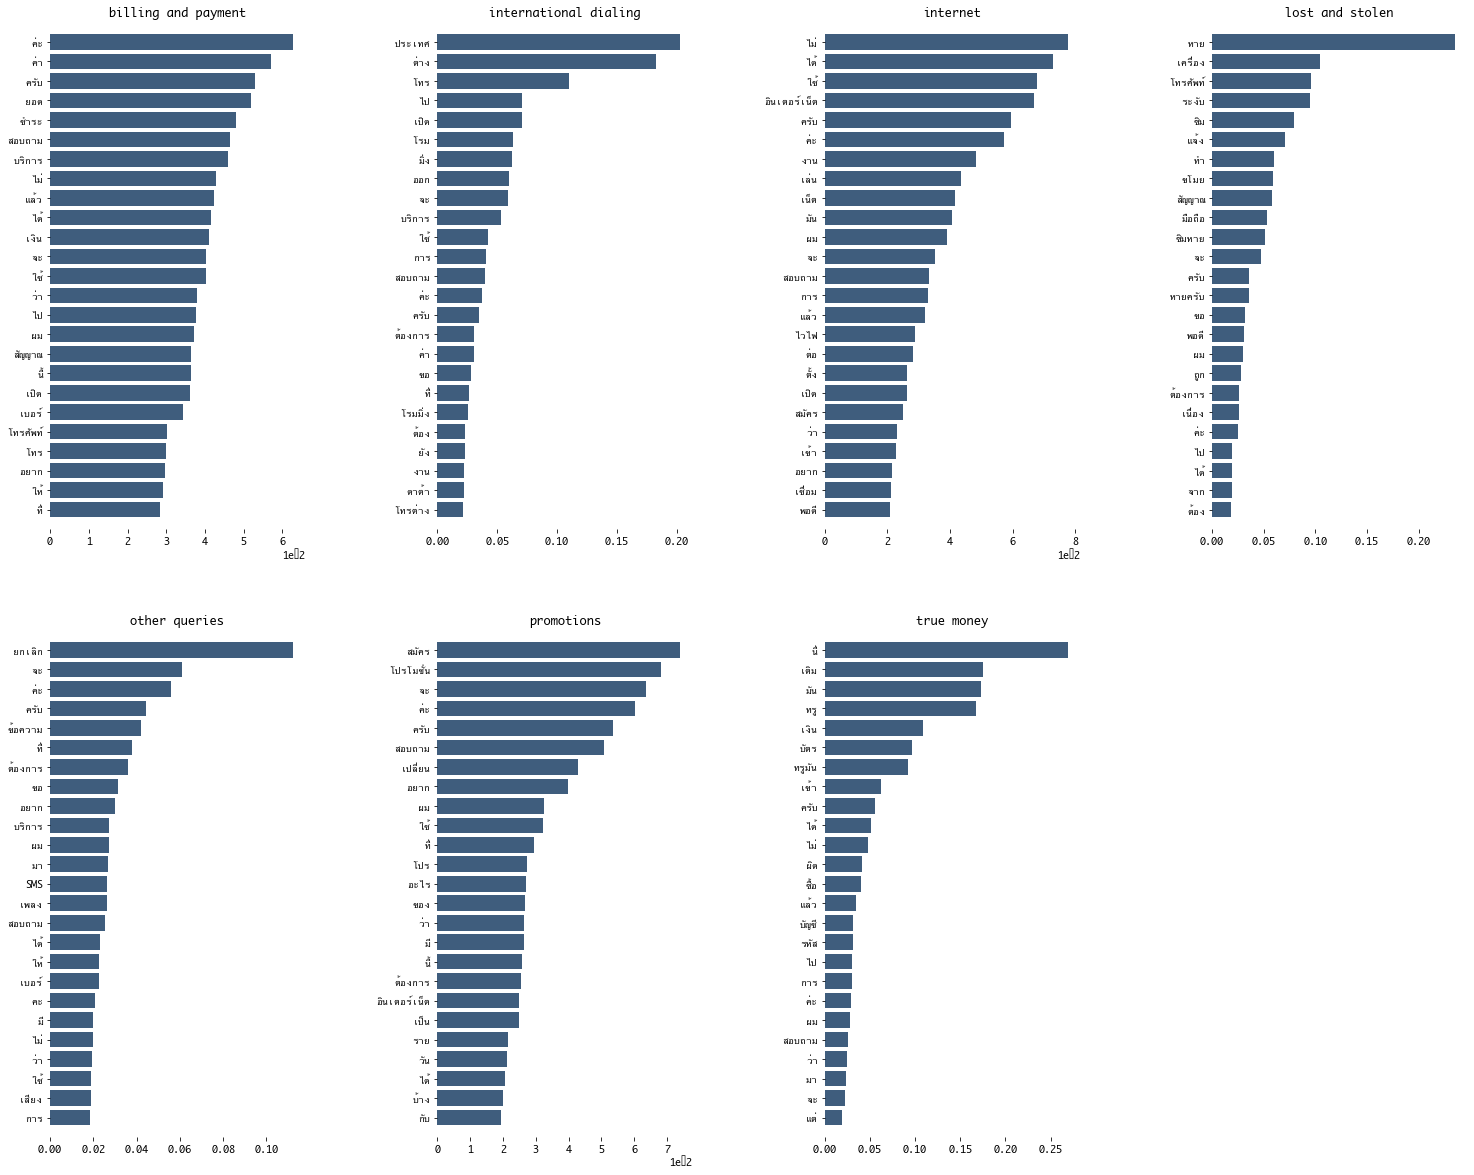

In [29]:
show_classfeats(
    df=all_df,
    vectorizer=TfidfVectorizer,
    analyzer=lambda x: x.split(),
    text_col='texts_deepcut',
    class_col='destination'
)